In [ ]:
#imports

## Day 1

To do this, count the number of times a depth measurement increases from the previous measurement.

How many measurements are larger than the previous measurement?

### Example

199 (N/A - no previous measurement)

200 (increased)

208 (increased)

210 (increased)

200 (decreased)

207 (increased)

240 (increased)

269 (increased)

260 (decreased)

263 (increased)

In [1]:
test_input=[199,200,208,210,200,207,240,269,260,263] #answer = 7

In [41]:
test_input_df=pd.DataFrame({0:test_input})

In [21]:
def day1_part1(input_list):
    count=0
    for i,item in enumerate(input_list[:-1]):
        if input_list[i+1] > item:
            count+=1
    return count

In [22]:
day1_part1(test_input)

7

In [32]:
day1_input=pd.read_csv('input_day1.txt',header=None)
day1list=day1_input[0].to_list()

In [33]:
day1_part1(day1list)

1393

### Part 2
Instead, consider sums of a three-measurement sliding window.

Start by comparing the first and second three-measurement windows. The measurements in the first window are marked A (199, 200, 208); their sum is 199 + 200 + 208 = 607. The second window is marked B (200, 208, 210); its sum is 618. The sum of measurements in the second window is larger than the sum of the first, so this first comparison increased.

Your goal now is to count the number of times the sum of measurements in this sliding window increases from the previous sum. So, compare A with B, then compare B with C, then C with D, and so on. Stop when there aren't enough measurements left to create a new three-measurement sum.

In [68]:
def day1_part2(input_series):
    count=0
    threedf=input_series.rolling(3)[0].sum().to_list()[2:]
    for i,item in enumerate(threedf[:-1]):
        if threedf[i+1] > item:
            count+=1
    return count

In [69]:
day1_part2(test_input_df) #answer should be 5

5

In [70]:
day1_part2(day1_input)

1359

# Day 2

It seems like the submarine can take a series of commands like forward 1, down 2, or up 3:

    forward X increases the horizontal position by X units.
    down X increases the depth by X units.
    up X decreases the depth by X units.

Note that since you're on a submarine, down and up affect your depth, and so they have the opposite result of what you might expect.

The submarine seems to already have a planned course (your puzzle input). You should probably figure out where it's going. For example:

forward 5
down 5
forward 8
up 3
down 8
forward 2

Your horizontal position and depth both start at 0. The steps above would then modify them as follows:

    forward 5 adds 5 to your horizontal position, a total of 5.
    down 5 adds 5 to your depth, resulting in a value of 5.
    forward 8 adds 8 to your horizontal position, a total of 13.
    up 3 decreases your depth by 3, resulting in a value of 2.
    down 8 adds 8 to your depth, resulting in a value of 10.
    forward 2 adds 2 to your horizontal position, a total of 15.

After following these instructions, you would have a horizontal position of 15 and a depth of 10. (Multiplying these together produces 150.)

Calculate the horizontal position and depth you would have after following the planned course. **What do you get if you multiply your final horizontal position by your final depth?**

In [71]:
test_input=pd.DataFrame({0:['forward','down','forward','up','down','forward'],1:[5,5,8,3,8,2]})

In [84]:
def day2_part1(day2_input):
    x,y=0,0
    #direction can only be forward, up, down
    day2_input.replace({'forward':0},inplace=True)
    day2_input.replace({'up':-1},inplace=True)
    day2_input.replace({'down':1},inplace=True)
    for _,row in day2_input.iterrows():
        if row[0] == 0:
            x+=row[1]
        else:
            y+=row[0]*row[1]
    print(x,y)
    return x*y
            

In [85]:
day2_part1(test_input)

15 10


150

In [87]:
day2_input=pd.read_csv('input_day2.txt',header=None,delimiter=' ')
day2_input.head()

,0,1
0,forward,8
1,forward,9
2,forward,9
3,down,3
4,forward,9


In [88]:
day2_part1(day2_input)

2003 872


1746616

## Part 2

In addition to horizontal position and depth, you'll also need to track a third value, aim, which also starts at 0. The commands also mean something entirely different than you first thought:

    down X increases your aim by X units.
    up X decreases your aim by X units.
    forward X does two things:
        It increases your horizontal position by X units.
        It increases your depth by your aim multiplied by X.

example: After following these new instructions, you would have a horizontal position of 15 and a depth of 60. (Multiplying these produces 900.)

In [100]:
def day2_part2(day2_input):
    x,y,aim=0,0,0
    #direction can only be forward, up, down
    day2_input.replace({'forward':0},inplace=True)
    day2_input.replace({'up':-1},inplace=True)
    day2_input.replace({'down':1},inplace=True)
    for _,row in day2_input.iterrows():
        if row[0] == 0:
            x+=row[1]
            y+=row[1]*aim
        else:
            aim+=row[0]*row[1]
    print(x,y,aim)
    return x*y

In [101]:
day2_part2(test_input)

15 60 10


900

In [102]:
day2_part2(day2_input)

2003 869681 872


1741971043

# Day 3

The diagnostic report (your puzzle input) consists of a list of binary numbers which, when decoded properly, can tell you many useful things about the conditions of the submarine. The first parameter to check is the power consumption.

You need to use the binary numbers in the diagnostic report to generate two new binary numbers (called the gamma rate and the epsilon rate). The power consumption can then be found by multiplying the gamma rate by the epsilon rate.

Each bit in the gamma rate can be determined by finding the most common bit in the corresponding position of all numbers in the diagnostic report. For example, given the following diagnostic report:

00100
11110
10110
10111
10101
01111
00111
11100
10000
11001
00010
01010

Considering only the first bit of each number, there are five 0 bits and seven 1 bits. Since the most common bit is 1, the first bit of the gamma rate is 1.

The most common second bit of the numbers in the diagnostic report is 0, so the second bit of the gamma rate is 0.

The most common value of the third, fourth, and fifth bits are 1, 1, and 0, respectively, and so the final three bits of the gamma rate are 110.

So, the gamma rate is the binary number 10110, or 22 in decimal.

The epsilon rate is calculated in a similar way; rather than use the most common bit, the least common bit from each position is used. So, the epsilon rate is 01001, or 9 in decimal. Multiplying the gamma rate (22) by the epsilon rate (9) produces the power consumption, 198.

Use the binary numbers in your diagnostic report to calculate the gamma rate and epsilon rate, then multiply them together. **What is the power consumption of the submarine?** (Be sure to represent your answer in decimal, not binary.)

In [103]:
test_input=['00100', '11110', '10110', '10111', '10101', '01111', '00111', '11100', '10000', '11001', '00010', '01010']

In [146]:
def day3_part1(blist,blen=5):
    gamma,epsilon=[],[]
    for i in range(blen):
        g=np.argmax(np.bincount([str(b)[i] for b in blist])) #most common bit
        gamma.append(str(g))
        epsilon.append(str(1-g))
    gamma_dec=int(''.join(gamma),2)
    epsilon_dec=int(''.join(epsilon),2)
    return gamma_dec*epsilon_dec


In [147]:
day3_part1(test_input,blen=5)

198

In [153]:
day3_input=pd.read_csv('input_day3.txt',header=None,converters={0: lambda x: str(x)})
day3list=day3_input[0].to_list()
len(day3list[0]),day3list[:10]

(12,
 ['111110110111',
  '110011001101',
  '110100000011',
  '100011000101',
  '110010010000',
  '100110100101',
  '111000010101',
  '011110011001',
  '111001110111',
  '101001101001'])

In [154]:
day3_part1(day3list,blen=12)

2724524

## Part 2

Next, you should verify the life support rating, which can be determined by multiplying the oxygen generator rating by the CO2 scrubber rating.

Both the oxygen generator rating and the CO2 scrubber rating are values that can be found in your diagnostic report - finding them is the tricky part. Both values are located using a similar process that involves filtering out values until only one remains. Before searching for either rating value, start with the full list of binary numbers from your diagnostic report and consider just the first bit of those numbers. Then:

    Keep only numbers selected by the bit criteria for the type of rating value for which you are searching. Discard numbers which do not match the bit criteria.
    If you only have one number left, stop; this is the rating value for which you are searching.
    Otherwise, repeat the process, considering the next bit to the right.

The bit criteria depends on which type of rating value you want to find:

    To find oxygen generator rating, determine the most common value (0 or 1) in the current bit position, and keep only numbers with that bit in that position. If 0 and 1 are equally common, keep values with a 1 in the position being considered.
    To find CO2 scrubber rating, determine the least common value (0 or 1) in the current bit position, and keep only numbers with that bit in that position. If 0 and 1 are equally common, keep values with a 0 in the position being considered.

For example, to determine the oxygen generator rating value using the same example diagnostic report from above:

    Start with all 12 numbers and consider only the first bit of each number. There are more 1 bits (7) than 0 bits (5), so keep only the 7 numbers with a 1 in the first position: 11110, 10110, 10111, 10101, 11100, 10000, and 11001.
    Then, consider the second bit of the 7 remaining numbers: there are more 0 bits (4) than 1 bits (3), so keep only the 4 numbers with a 0 in the second position: 10110, 10111, 10101, and 10000.
    In the third position, three of the four numbers have a 1, so keep those three: 10110, 10111, and 10101.
    In the fourth position, two of the three numbers have a 1, so keep those two: 10110 and 10111.
    In the fifth position, there are an equal number of 0 bits and 1 bits (one each). So, to find the oxygen generator rating, keep the number with a 1 in that position: 10111.
    As there is only one number left, stop; the oxygen generator rating is 10111, or 23 in decimal.

Then, to determine the CO2 scrubber rating value from the same example above:

    Start again with all 12 numbers and consider only the first bit of each number. There are fewer 0 bits (5) than 1 bits (7), so keep only the 5 numbers with a 0 in the first position: 00100, 01111, 00111, 00010, and 01010.
    Then, consider the second bit of the 5 remaining numbers: there are fewer 1 bits (2) than 0 bits (3), so keep only the 2 numbers with a 1 in the second position: 01111 and 01010.
    In the third position, there are an equal number of 0 bits and 1 bits (one each). So, to find the CO2 scrubber rating, keep the number with a 0 in that position: 01010.
    As there is only one number left, stop; the CO2 scrubber rating is 01010, or 10 in decimal.

Finally, to find the life support rating, multiply the oxygen generator rating (23) by the CO2 scrubber rating (10) to get 230.

Use the binary numbers in your diagnostic report to calculate the oxygen generator rating and CO2 scrubber rating, then multiply them together. What is the life support rating of the submarine? (Be sure to represent your answer in decimal, not binary.)

In [194]:
from operator import lt, ge

In [199]:
def filter_values(blist,i,fn=ge):
    ones=[b for b in blist if b[i] == '1']
    zeros=[b for b in blist if b[i] == '0']
    if fn(len(ones),len(zeros)):
        blist=ones
    else: 
        blist=zeros
    return blist

def day3_part2(blist,blen=5):
    o2=blist.copy()
    co2=blist.copy()
    for i in range(blen):
        o2=filter_values(o2,i)
        if len(o2)==1:
            break
    for i in range(blen):
        co2=filter_values(co2,i,fn=lt)
        #print(i,co2)
        if len(co2)==1:
            break
    return int(o2[0],2)*int(co2[0],2)


In [200]:
day3_part2(test_input)

230

In [201]:
day3_part2(day3list,blen=12)

2775870

# Day 4

The submarine has a bingo subsystem to help passengers (currently, you and the giant squid) pass the time. It automatically generates a random order in which to draw numbers and a random set of boards (your puzzle input). 
After the first five numbers are drawn (7, 4, 9, 5, and 11), there are no winners, but the boards are marked as follows (shown here adjacent to each other to save space):

After the next six numbers are drawn (17, 23, 2, 0, 14, and 21), there are still no winners:

Finally, 24 is drawn:

At this point, the third board wins because it has at least one complete row or column of marked numbers (in this case, the entire top row is marked: 14 21 17 24 4).

The score of the winning board can now be calculated. Start by finding the sum of all unmarked numbers on that board; in this case, the sum is 188. Then, multiply that sum by the number that was just called when the board won, 24, to get the final score, 188 * 24 = 4512.

To guarantee victory against the giant squid, figure out which board will win first. What will your final score be if you choose that board?

In [33]:
import numpy.ma 
from numpy.ma import MaskError

In [65]:
class Bingo():
    def __init__(self,textfile,let_the_squid_win=False):
        moves,boards=self.read_input(textfile)
        self.moves=moves
        self.boards=boards
        self.let_the_squid_win=let_the_squid_win
        print(len(self.boards))
        
    def read_input(self,textfile):
        with open(textfile) as f:
            lines=f.readlines()
            moves=lines[0][:-3].split(',')
            moves=[int(m) for m in moves]
        nboards=(len(lines)-1)//5
        #print(nboards)
        df=pd.read_csv(textfile,header=None,skiprows=1)
        boards=[df[0][i*5:5*(i+1)].values.tolist() for i in range(nboards)]
        for i,board in enumerate(boards):
            blist=[row.strip().replace('  ',' ').split(' ') for row in board]
            blon=[int(b) for row in blist for b in row]
            try:
                barr=np.ma.array(blon,mask=np.zeros((5,5))).reshape((5,5))
                boards[i]=barr
            except MaskError:
                boards=boards[:i]
                break
        return moves,boards
    
    def draw_number(self,move):
        for i,board in enumerate(self.boards):
            num_loc=np.where(board == move)
            #print(num_loc[0],num_loc[1],num_loc[0].size)
            if num_loc[0].size !=0:
                cmask=self.boards[i].mask
                cmask[num_loc[0],num_loc[1]] = True
                self.boards[i].mask=cmask
                
    def check_win(self,wins):
        winning_board=0
        for i,board in enumerate(self.boards):
            if i not in wins:
                bmask=board.mask
                rowsums=np.sum(bmask,axis=0)
                colsums=np.sum(bmask,axis=1)
                if 5 in rowsums or 5 in colsums:
                    wins.append(i)
                    winning_board=board
                    if not self.let_the_squid_win:
                        break #doesn't allow for tie
                    else: #multiple boards can win at once
                        print(f'board {i} has won!')
        return wins,winning_board
    
    def calc_score(self,winning_move,winning_board):
        #sum of all unwinning numbers times number of winning move
        return winning_move*np.sum(winning_board)
    
    def play_bingo(self):
        wins=[-1]
        for move in self.moves:
            self.draw_number(move)
            #print(move)
            wins,winning_board=self.check_win(wins)
            if type(winning_board) == np.ma.masked_array and self.let_the_squid_win == False:
                score=self.calc_score(move,winning_board)
                break
            elif len(np.unique(wins))==len(self.boards)+1: #or move= last_move
                print(move,win,winning_board)
                score=self.calc_score(move,winning_board)
                break
        return wins,winning_board,score

In [66]:
_,_,score=Bingo('test_input_day4.txt').play_bingo()
score

3


4512

In [67]:
win,winning_board,score=Bingo('input_day4.txt').play_bingo()
score

100


16674

## Part Two 

On the other hand, it might be wise to try a different strategy: let the giant squid win.

You aren't sure how many bingo boards a giant squid could play at once, so rather than waste time counting its arms, the safe thing to do is to figure out which board will win last and choose that one. That way, no matter which boards it picks, it will win for sure.

In the above example, the second board is the last to win, which happens after 13 is eventually called and its middle column is completely marked. If you were to keep playing until this point, the second board would have a sum of unmarked numbers equal to 148 for a final score of 148 * 13 = 1924.

**Figure out which board will win last. Once it wins, what would its final score be?**


In [68]:
win,_,score=Bingo('test_input_day4.txt',let_the_squid_win=True).play_bingo()
win,score

3
board 2 has won!
board 0 has won!
board 1 has won!
13 [-1, 34] [[3 15 -- -- 22]
 [-- 18 -- -- --]
 [19 8 -- 25 --]
 [20 -- -- -- --]
 [-- -- -- 12 6]]


([-1, 2, 0, 1], 1924)

In [70]:
win,winning_board,score=Bingo('input_day4.txt',let_the_squid_win=True).play_bingo()
score

100
board 34 has won!
board 73 has won!
board 87 has won!
board 97 has won!
board 62 has won!
board 1 has won!
board 79 has won!
board 8 has won!
board 9 has won!
board 20 has won!
board 38 has won!
board 57 has won!
board 83 has won!
board 88 has won!
board 14 has won!
board 21 has won!
board 58 has won!
board 75 has won!
board 72 has won!
board 74 has won!
board 65 has won!
board 27 has won!
board 49 has won!
board 69 has won!
board 10 has won!
board 32 has won!
board 36 has won!
board 68 has won!
board 26 has won!
board 96 has won!
board 45 has won!
board 78 has won!
board 91 has won!
board 92 has won!
board 95 has won!
board 90 has won!
board 5 has won!
board 61 has won!
board 76 has won!
board 99 has won!
board 12 has won!
board 94 has won!
board 31 has won!
board 37 has won!
board 48 has won!
board 53 has won!
board 81 has won!
board 93 has won!
board 13 has won!
board 55 has won!
board 42 has won!
board 60 has won!
board 54 has won!
board 67 has won!
board 2 has won!
board 70 ha

7075

# Day 5

Each line of vents is given as a line segment in the format x1,y1 -> x2,y2 where x1,y1 are the coordinates of one end the line segment and x2,y2 are the coordinates of the other end. These line segments include the points at both ends. In other words:

    An entry like 1,1 -> 1,3 covers points 1,1, 1,2, and 1,3.
    An entry like 9,7 -> 7,7 covers points 9,7, 8,7, and 7,7.

For now, only consider horizontal and vertical lines: lines where either x1 = x2 or y1 = y2.

So, the horizontal and vertical lines from the above list would produce the following diagram:

.......1..

..1....1..

..1....1..

.......1..

.112111211

..........

..........

..........

..........

222111....

In this diagram, the top left corner is 0,0 and the bottom right corner is 9,9. Each position is shown as the number of lines which cover that point or . if no line covers that point. The top-left pair of 1s, for example, comes from 2,2 -> 2,1; the very bottom row is formed by the overlapping lines 0,9 -> 5,9 and 0,9 -> 2,9.

To avoid the most dangerous areas, you need to determine the number of points where at least two lines overlap. In the above example, this is anywhere in the diagram with a 2 or larger - a total of 5 points.

**Consider only horizontal and vertical lines. At how many points do at least two lines overlap?**

In [71]:
test_input=[[0,9,5,9],
[8,0,0,8],
[9,4,3,4],
[2,2,2,1],
[7,0,7,4],
[6,4,2,0],
[0,9,2,9],
[3,4,1,4],
[0,0,8,8],
[5,5,8,2]]

In [171]:
def overlap(input_list):
    '''produce the diagram array'''
    arr=np.array(input_list)
    xmax=np.max([arr.T[0],arr.T[2]])+1
    ymax=np.max([arr.T[1],arr.T[3]])+1
    print(xmax,ymax)
    diagram=np.zeros((xmax,ymax))
    #fill diagram
    for x1,y1,x2,y2 in input_list:
        #print((x1,y1),(x2,y2))
        if x1 == x2: #vertical
            diagram[min([y1,y2]):max([y1,y2])+1,x1]+=1
            #print(diagram)
        elif y1==y2: #horizontal
            diagram[y1,min([x1,x2]):max([x1,x2])+1]+=1
            #print(diagram)
    return diagram

In [169]:
diagram=overlap(test_input)

In [170]:
diagram

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 1., 2., 1., 1., 1., 2., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 2., 2., 1., 1., 1., 0., 0., 0., 0.]])

In [150]:
diagram[diagram >=2].shape

(5,)

In [180]:
with open('input_day5.txt') as f:
    lines=f.readlines()
str_input=[]
for l in lines:
    str_input.append(l[:-1].split(','))
day5_input=[[int(s) for s in line] for line in str_input]

In [181]:
day5_input[:2]

[[720, 475, 720, 669], [268, 784, 595, 784]]

In [182]:
diagram=overlap(day5_input)

991 991


In [183]:
diagram[diagram >=2].shape

(7269,)

## Part 2

Unfortunately, considering only horizontal and vertical lines doesn't give you the full picture; you need to also consider diagonal lines.

Because of the limits of the hydrothermal vent mapping system, the lines in your list will only ever be horizontal, vertical, or a diagonal line at exactly 45 degrees. In other words:

    An entry like 1,1 -> 3,3 covers points 1,1, 2,2, and 3,3.
    An entry like 9,7 -> 7,9 covers points 9,7, 8,8, and 7,9.

Considering all lines from the above example would now produce the following diagram:

1.1....11.

.111...2..

..2.1.111.

...1.2.2..

.112313211

...1.2....

..1...1...

.1.....1..

1.......1.

222111....

You still need to determine the number of points where at least two lines overlap. In the above example, this is still anywhere in the diagram with a 2 or larger - now a total of 12 points.

Consider all of the lines. At how many points do at least two lines overlap?

In [308]:
def overlap2(input_list):
    '''produce the diagram array'''
    arr=np.array(input_list)
    xmax=np.max([arr.T[0],arr.T[2]])+1
    ymax=np.max([arr.T[1],arr.T[3]])+1
    print(xmax,ymax)
    diagram=np.zeros((xmax,ymax))
    #fill diagram
    for x1,y1,x2,y2 in input_list:
        #print((x1,y1),(x2,y2))
        if x1 == x2: #vertical
            diagram[min([y1,y2]):max([y1,y2])+1,x1]+=1
            #print(diagram)
        elif y1==y2: #horizontal
            diagram[y1,min([x1,x2]):max([x1,x2])+1]+=1
            #print(diagram)
        else: #diagonal at 45 degrees
            #print((x1,y1),(x2,y2))
            #change so x1 is paired with min(y1,y2)
            if y2 < y1:
                #print('swap')
                x1,y1,x2,y2=x2,y2,x1,y1
                #print((x1,y1),(x2,y2))
            y,yend=y1,y2
            if x1>x2: #backward diag
                x=x1
                minus=True
            elif x2>x1: #backward
                x=x1
                minus=False
            while y <=yend:
                diagram[y,x]+=1
                if minus:
                    x-=1
                else:
                    x+=1
                y+=1
    return diagram

In [309]:
diagram=overlap2(test_input)
diagram

10 10


array([[1., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 1., 1., 0., 0., 0., 2., 0., 0.],
       [0., 0., 2., 0., 1., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 0., 2., 0., 2., 0., 0.],
       [0., 1., 1., 2., 3., 1., 3., 2., 1., 1.],
       [0., 0., 0., 1., 0., 2., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [2., 2., 2., 1., 1., 1., 0., 0., 0., 0.]])

In [310]:
diagram[diagram >=2].shape

(12,)

In [311]:
diagram=overlap2(day5_input)
diagram[diagram>=2].shape

991 991


(21140,)

# Day 6

So, suppose you have a lanternfish with an internal timer value of 3:

    After one day, its internal timer would become 2.
    After another day, its internal timer would become 1.
    After another day, its internal timer would become 0.
    After another day, its internal timer would reset to 6, and it would create a new lanternfish with an internal timer of 8.
    After another day, the first lanternfish would have an internal timer of 5, and the second lanternfish would have an internal timer of 7.

A lanternfish that creates a new fish resets its timer to 6, not 7 (because 0 is included as a valid timer value). The new lanternfish starts with an internal timer of 8 and does not start counting down until the next day.

Realizing what you're trying to do, the submarine automatically produces a list of the ages of several hundred nearby lanternfish (your puzzle input). For example, suppose you were given the following list:

3,4,3,1,2

This list means that the first fish has an internal timer of 3, the second fish has an internal timer of 4, and so on until the fifth fish, which has an internal timer of 2. Simulating these fish over several days would proceed as follows:

Initial state: 3,4,3,1,2

After  1 day:  2,3,2,0,1

After  2 days: 1,2,1,6,0,8

After  3 days: 0,1,0,5,6,7,8

After  4 days: 6,0,6,4,5,6,7,8,8

After  5 days: 5,6,5,3,4,5,6,7,7,8

After  6 days: 4,5,4,2,3,4,5,6,6,7

After  7 days: 3,4,3,1,2,3,4,5,5,6

After  8 days: 2,3,2,0,1,2,3,4,4,5

After  9 days: 1,2,1,6,0,1,2,3,3,4,8

After 10 days: 0,1,0,5,6,0,1,2,2,3,7,8

After 11 days: 6,0,6,4,5,6,0,1,1,2,6,7,8,8,8

After 12 days: 5,6,5,3,4,5,6,0,0,1,5,6,7,7,7,8,8

After 13 days: 4,5,4,2,3,4,5,6,6,0,4,5,6,6,6,7,7,8,8

After 14 days: 3,4,3,1,2,3,4,5,5,6,3,4,5,5,5,6,6,7,7,8

After 15 days: 2,3,2,0,1,2,3,4,4,5,2,3,4,4,4,5,5,6,6,7

After 16 days: 1,2,1,6,0,1,2,3,3,4,1,2,3,3,3,4,4,5,5,6,8

After 17 days: 0,1,0,5,6,0,1,2,2,3,0,1,2,2,2,3,3,4,4,5,7,8

After 18 days: 6,0,6,4,5,6,0,1,1,2,6,0,1,1,1,2,2,3,3,4,6,7,8,8,8,8

Each day, a 0 becomes a 6 and adds a new 8 to the end of the list, while each other number decreases by 1 if it was present at the start of the day.

In this example, after 18 days, there are a total of 26 fish. After 80 days, there would be a total of 5934.

Find a way to simulate lanternfish. How many lanternfish would there be after 80 days?

In [420]:
class Lanternfish:
    def __init__(self,internal_timer=3):
        self.state=internal_timer
        self.ncycles=0
        
    def countdown(self):
        if self.state == 0:
            self.ncycles +=1
            self.state = 6
        else:
            self.state -=1
        return self.state
        
def fish_sim(initial_state, days):
    fish=[Lanternfish(internal_timer=s) for s in initial_state]
    for d in range(days):
        fish_state=[f.countdown() for f in fish]
        #if there's a six, append an 8 at the end
        n_spawned=np.where(np.array(fish_state) == 0)[0].size
        #print(n_spawned)
        for n in range(n_spawned):
            fish.append(Lanternfish(internal_timer=9)) #plus one because countdown shouldn't begin when it spawns
        #print(fish_state,len(fish))
    return fish_state, len(fish)-n_spawned #since I initialize them early...
        

In [10]:
test_initial_state=[3,4,3,1,2]

In [462]:
%time states,nfish=fish_sim(test_initial_state,80)
nfish

CPU times: user 30.8 ms, sys: 4.03 ms, total: 34.8 ms
Wall time: 33.8 ms


5934

In [33]:
full_input=[1,4,3,3,1,3,1,1,1,2,1,1,1,4,4,1,5,5,3,1,3,5,2,1,5,2,4,1,4,5,4,1,5,1,5,5,1,1,1,4,1,5,1,1,1,1,1,4,1,2,5,1,4,1,2,1,1,5,1,1,1,1,4,1,5,1,1,2,1,4,5,1,2,1,2,2,1,1,1,1,1,5,5,3,1,1,1,1,1,4,2,4,1,2,1,4,2,3,1,4,5,3,3,2,1,1,5,4,1,1,1,2,1,1,5,4,5,1,3,1,1,1,1,1,1,2,1,3,1,2,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,4,5,1,3,1,4,4,2,3,4,1,1,1,5,1,1,1,4,1,5,4,3,1,5,1,1,1,1,1,5,4,1,1,1,4,3,1,3,3,1,3,2,1,1,3,1,1,4,5,1,1,1,1,1,3,1,4,1,3,1,5,4,5,1,1,5,1,1,4,1,1,1,3,1,1,4,2,3,1,1,1,1,2,4,1,1,1,1,1,2,3,1,5,5,1,4,1,1,1,1,3,3,1,4,1,2,1,3,1,1,1,3,2,2,1,5,1,1,3,2,1,1,5,1,1,1,1,1,1,1,1,1,1,2,5,1,1,1,1,3,1,1,1,1,1,1,1,1,5,5,1
]

In [463]:
%time states,nfish=fish_sim(full_input,80)
nfish

CPU times: user 1.73 s, sys: 86.5 ms, total: 1.82 s
Wall time: 1.84 s


379114

## Part 2

Suppose the lanternfish live forever and have unlimited food and space. Would they take over the entire ocean?

After 256 days in the example above, there would be a total of 26984457539 lanternfish!

In [40]:
# okay my slow code will definitely hurt me here... forget objects, let's use arrays
def fast_fish_sim(initial_state, days=18):
    states=[0 for i in range (9)] #every possible state
    for i in initial_state:
        states[i]+=1
    for i in range(days):
        n_spawned=states.pop(0) #remove zeros
        states.append(n_spawned)
        states[6]+=n_spawned #zeros become 6's
    return sum(states)
        

In [41]:
%time fast_fish_sim(full_input,256)

CPU times: user 88 µs, sys: 0 ns, total: 88 µs
Wall time: 88.7 µs


1702631502303

# Day 7

There's one major catch - crab submarines can only move horizontally.

You quickly make a list of the horizontal position of each crab (your puzzle input). Crab submarines have limited fuel, so you need to find a way to make all of their horizontal positions match while requiring them to spend as little fuel as possible.

For example, consider the following horizontal positions:

16,1,2,0,4,2,7,1,2,14

This means there's a crab with horizontal position 16, a crab with horizontal position 1, and so on.

Each change of 1 step in horizontal position of a single crab costs 1 fuel. You could choose any horizontal position to align them all on, but the one that costs the least fuel is horizontal position 2:

    Move from 16 to 2: 14 fuel
    Move from 1 to 2: 1 fuel
    Move from 2 to 2: 0 fuel
    Move from 0 to 2: 2 fuel
    Move from 4 to 2: 2 fuel
    Move from 2 to 2: 0 fuel
    Move from 7 to 2: 5 fuel
    Move from 1 to 2: 1 fuel
    Move from 2 to 2: 0 fuel
    Move from 14 to 2: 12 fuel

This costs a total of 37 fuel. This is the cheapest possible outcome; more expensive outcomes include aligning at position 1 (41 fuel), position 3 (39 fuel), or position 10 (71 fuel).

Determine the horizontal position that the crabs can align to using the least fuel possible. **How much fuel must they spend to align to that position?**

In [1]:
test_input=[16,1,2,0,4,2,7,1,2,14]

In [18]:
def optimize_fuel(initial_positions):
    #the answer is literally just the median
    initial_guess=np.round(np.median(initial_positions),0)
    least_cost=np.sum(np.abs(initial_positions-initial_guess))
    return least_cost,initial_guess

In [3]:
full_input=[1101,1,29,67,1102,0,1,65,1008,65,35,66,1005,66,28,1,67,65,20,4,0,1001,65,1,65,1106,0,8,99,35,67,101,99,105,32,110,39,101,115,116,32,112,97,115,32,117,110,101,32,105,110,116,99,111,100,101,32,112,114,111,103,114,97,109,10,322,659,689,304,1706,69,576,110,238,904,299,206,78,954,776,590,404,125,235,438,472,187,205,620,14,378,1056,496,1323,59,44,636,432,658,30,195,107,425,105,214,908,145,641,1467,441,346,455,1454,773,146,97,42,509,8,1217,503,901,1147,1654,45,1438,503,62,851,590,105,217,44,646,197,491,333,1224,90,262,1132,1499,864,128,165,36,646,422,1265,501,414,328,170,1566,115,1049,154,224,490,1018,1019,1484,315,614,816,207,240,423,132,196,484,532,857,341,723,69,294,787,1020,691,185,525,697,1435,62,156,21,314,489,640,93,415,446,902,15,510,91,104,317,971,108,187,616,794,416,1332,499,1086,443,514,258,383,162,1034,1,331,269,283,1835,150,1698,1020,318,1540,687,17,889,585,1682,67,547,1,1353,149,1650,145,13,151,1144,409,294,740,676,267,827,1624,804,44,795,297,265,426,508,11,1359,963,277,203,1093,450,1229,287,160,1913,914,512,1098,103,975,64,26,787,87,104,340,362,153,173,93,455,89,577,40,1459,320,398,1245,12,452,515,594,0,1497,1238,88,14,538,431,0,699,1033,483,574,593,612,770,1006,332,23,753,1334,536,109,164,250,86,333,1577,896,1199,521,73,467,1037,0,539,375,1243,238,301,262,191,415,88,515,1410,54,1019,934,81,1273,78,306,57,145,472,57,682,203,63,512,427,104,457,214,197,1766,350,355,536,839,7,586,1209,71,88,858,562,64,335,84,1161,1305,1203,102,52,193,47,852,718,885,146,111,1014,667,8,52,637,254,1453,674,1542,47,107,55,321,591,829,1113,40,215,398,254,327,181,200,20,129,265,109,705,1265,12,148,367,349,333,341,272,90,166,699,681,1927,1267,86,282,299,36,48,1594,110,645,569,724,199,334,239,117,448,108,67,1257,142,902,208,728,700,107,1,621,1036,1397,837,313,380,208,156,39,220,238,648,197,26,2,1010,98,458,271,1237,99,751,31,236,26,622,802,4,121,244,240,67,462,1181,100,1381,1494,446,23,35,95,357,212,90,820,56,96,171,11,1101,1020,149,125,1504,896,25,8,1704,193,421,134,135,1397,1052,1059,741,967,1537,373,585,279,46,398,654,305,435,89,11,702,27,102,573,497,139,530,805,3,122,1329,175,134,137,57,516,790,587,163,296,153,1124,1336,946,63,39,278,13,253,237,653,200,250,1067,1891,697,182,628,0,60,303,389,1821,189,295,41,619,71,795,1228,110,1198,306,941,59,72,666,610,850,984,564,330,636,111,1541,542,80,212,927,127,427,33,365,313,697,200,286,708,478,264,448,1159,256,28,273,7,238,176,956,735,264,361,1882,139,1345,1,271,508,0,190,110,119,76,715,1338,80,1026,132,286,966,337,1715,514,328,265,63,1376,1413,1421,457,66,1594,737,59,548,184,801,165,96,129,1200,50,604,1013,309,627,625,597,1012,77,670,177,264,115,174,109,148,270,24,346,33,1270,359,954,113,207,484,1756,1155,1067,991,1358,61,530,612,135,351,706,244,489,609,484,76,168,258,161,694,1019,1502,558,117,112,1041,1040,448,879,37,616,930,32,357,1650,231,458,1068,585,9,439,412,292,116,494,246,28,260,463,200,84,1106,750,667,1284,129,878,1077,453,960,409,1327,412,243,89,616,443,256,645,1083,526,95,818,9,59,76,541,312,1168,430,64,2,187,561,1322,369,1245,64,854,126,359,240,42,157,35,232,863,74,331,250,695,914,182,208,94,656,87,530,1444,163,429,46,299,1038,38,471,91,112,819,1644,244,1718,76,806,103,752,124,796,1183,15,829,1038,6,529,913,140,326,435,44,617,659,123,753,444,467,408,182,1387,202,684,60,55,26,155,902,1075,86,375,924,862,150,1230,700,143,417,156,933,872,639,1032,137,146,1649,1562,4,11,257,556,29,1440,177,935,741,492,300,1530,92,453,56,244,37,997,762,624,456,1182,845,150,367,393,334,338,100,278,1374,267,1261,25,106,332,25,2,14,123,288,600,880,838,323,183,1075,202,445,218,1538,73,300,555,322,587,7,606,753,676,28,57,557,1283,23,73,31,370,29,491,5,31,97,199,188,1088,276,1061,1043,42,1463,601,56,255,426,150,1451,562,0,408,7,701,111,1145,838,976,310,561,645,33,213,1020,73,81,849,2,586,825,183,2,704,59,1515,906,647,91,585,14,778,333,258,353,128,839,146,81,231,128,716,699,64,345,812,906,1180,286,243,295,1031,197,1392]

In [19]:
optimize_fuel(full_input)

(349769.0, 331.0)

## Part 2

As it turns out, crab submarine engines don't burn fuel at a constant rate. Instead, each change of 1 step in horizontal position costs 1 more unit of fuel than the last: the first step costs 1, the second step costs 2, the third step costs 3, and so on.

As each crab moves, moving further becomes more expensive. This changes the best horizontal position to align them all on; in the example above, this becomes 5:

    Move from 16 to 5: 66 fuel
    Move from 1 to 5: 10 fuel
    Move from 2 to 5: 6 fuel
    Move from 0 to 5: 15 fuel
    Move from 4 to 5: 1 fuel
    Move from 2 to 5: 6 fuel
    Move from 7 to 5: 3 fuel
    Move from 1 to 5: 10 fuel
    Move from 2 to 5: 6 fuel
    Move from 14 to 5: 45 fuel

This costs a total of 168 fuel. This is the new cheapest possible outcome; the old alignment position (2) now costs 206 fuel instead.

Determine the horizontal position that the crabs can align to using the least fuel possible so they can make you an escape route! How much fuel must they spend to align to that position?

In [15]:
def optimize_fuel2(initial_positions):
    initial_guess=np.round(np.mean(initial_positions),0) #makes sense for mean to be initial guess now
    #in fact it is probably the solution yay math
    guess=initial_guess
    least_cost=np.sum([np.sum(range(int(np.abs(p-guess))+1)) for p in initial_positions])
    #print(initial_guess,least_cost,[np.sum(range(int(np.abs(p-guess))+1)) for p in initial_positions])
    for i in range(int(initial_guess)-10,int(initial_guess)+10):
        cost=np.sum([np.sum(range(int(np.abs(p-i))+1)) for p in initial_positions])
        if cost < least_cost:
            least_cost=cost
            guess=i
    return least_cost,guess

In [16]:
optimize_fuel2(test_input)

(168, 5.0)

In [17]:
optimize_fuel2(full_input)

(99540554, 479)

# Day 8

In [42]:
key=['abcefg','cf','acdeg','acdfg','bcdf','abdfg','abdefg','acf','abcdefg','abcdfg']
lens=[len(k) for k in key]

In [73]:
df=pd.DataFrame({'key':key,'length':lens})
df.sort_values(by='length').head(10)

,key,length
1,cf,2
7,acf,3
4,bcdf,4
2,acdeg,5
3,acdfg,5
5,abdfg,5
0,abcefg,6
6,abdefg,6
9,abcdfg,6
8,abcdefg,7


In [403]:
test_input=['be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe'
,'edbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec | fcgedb cgb dgebacf gc',
'fgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef | cg cg fdcagb cbg',
'fbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega | efabcd cedba gadfec cb',
'aecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga | gecf egdcabf bgf bfgea',
'fgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf | gebdcfa ecba ca fadegcb',
'dbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf | cefg dcbef fcge gbcadfe',
'bdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd | ed bcgafe cdgba cbgef',
'egadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg | gbdfcae bgc cg cgb',
'gcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc | fgae cfgab fg bagce']

In [108]:
output=np.array([t[t.find('|')+2:].split(' ') for t in test_input]).reshape(40)

In [109]:
#digits are 1,4,7, or 8 if lengths of output strings are 2,3,4, or 7
good_digits=[o for o in output if len(o) <=4 or len(o) ==7] #assume no 1-length strings
len(good_digits)

26

In [421]:
with open('input_day8.txt') as f:
    day8lines=f.readlines()

In [415]:
day8_input=np.array([t[t.find('|')+2:-1].split(' ') for t in lines]).flatten()

In [121]:
good_digits=[o for o in output if len(o) <=4 or len(o) ==7] #assume no 1-length strings
len(good_digits)

476

## Part 2

The unique signal patterns correspond to the ten different ways the submarine tries to render a digit using the current wire/segment connections.

each of these 10 different ways has lengths corresponding to lengths of actual signals! 

In [329]:
test_input[0]

'be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe'

In [379]:
i=0
test_output=test_input[i][test_input[i].find('|')+2:].split(' ')
test_output, [len(t) for t in test_output]

(['fdgacbe', 'cefdb', 'cefbgd', 'gcbe'], [7, 5, 6, 4])

In [336]:
signal=test_input[0].split(' ')
signal

['be',
 'cfbegad',
 'cbdgef',
 'fgaecd',
 'cgeb',
 'fdcge',
 'agebfd',
 'fecdb',
 'fabcd',
 'edb',
 '|',
 'fdgacbe',
 'cefdb',
 'cefbgd',
 'gcbe']

In [422]:
def decoder(signal):
    patterns = sorted(signal[:10], key=len)
    unique_lens={2:'1',3:'7',4:'4',7:'8'}
    solution={'1':patterns[0],'7':patterns[1],'4':patterns[2],'8':patterns[-1]}
    
    l6=patterns[6:9]
    for num in l6: #only chars 2 and 3 unique: 0:ce,6:de,9:cd
        if solution['4'][0] in num and solution['4'][1] in num and solution['4'][2] in num and solution['4'][3] in num:
            solution['9'] = num
        elif solution['1'][0] in num and solution['1'][1] in num:
            solution['0'] = num
        else:
            solution['6'] = num
    
    l5=patterns[3:6]
    for num in l5: #middle 3 unique - 2: cde, 3 :cdf,5: bdf
        #print(num[1:4], solution['1'][0],solution['1'][1],solution['4'][2])
        if solution['1'][0] in num and solution['1'][1] in num: #c & f
            solution['3'] = num
        elif all([n in solution['6'] for n in num]):
            solution['5']=num
        else:
            solution['2'] = num
    return solution

def decode_line(output,key):
    vals=''
    for o in output:
        for i in range(10):
            if len(o) == len(key[str(i)]) and np.array([x in key[str(i)]for x in o]).all() == True:
                vals+=str(i)
                break
    return int(vals)

def decode_all(lines):
    score=0
    for line in lines:
        signal=line[:-1].split(' ')
        key=decoder(signal[:10])
        score+=decode_line(signal[11:],key)
    return score

In [407]:
decode_all(test_input)

61229

In [423]:
decode_all(day8lines)

1011823

that means... 'be' = 'cf' = 2, 'edb' = 'acf' = 3, 'cgeb'= 'bcdf' = 4 etc... permutations allowed of course!

so only non-unique ones have index 3:6 and 6:8


# Day 9

In the above example, there are four low points, all highlighted: two are in the first row (a 1 and a 0), one is in the third row (a 5), and one is in the bottom row (also a 5). All other locations on the heightmap have some lower adjacent location, and so are not low points.

The risk level of a low point is 1 plus its height. In the above example, the risk levels of the low points are 2, 1, 6, and 6. The sum of the risk levels of all low points in the heightmap is therefore 15.

Find all of the low points on your heightmap. What is the sum of the risk levels of all low points on your heightmap?

In [424]:
test_input=np.array([
[2,1,9,9,9,4,3,2,1,0],
[3,9,8,7,8,9,4,9,2,1],
[9,8,5,6,7,8,9,8,9,2],
[8,7,6,7,8,9,6,7,8,9],
[9,8,9,9,9,6,5,6,7,8]])

In [495]:
test_input,test_input.shape

(array([[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
        [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
        [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
        [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
        [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]]),
 (5, 10))

In [431]:
dx=np.diff(test_input,axis=1) # along horizontal axis

In [438]:
test_input,dx

(array([[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
        [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
        [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
        [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
        [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]]),
 array([[-1,  8,  0,  0, -5, -1, -1, -1, -1],
        [ 6, -1, -1,  1,  1, -5,  5, -7, -1],
        [-1, -3,  1,  1,  1,  1, -1,  1, -7],
        [-1, -1,  1,  1,  1, -3,  1,  1,  1],
        [-1,  1,  0,  0, -3, -1,  1,  1,  1]]))

if value goes from - to +, there is a local minimum in the horizontal direction

so if i>0 but i-1 <0

In [533]:
def x_min(test_input,dx):
    xm=[]
    for j,d in enumerate(dx):
        for i,x in enumerate(d[:-1]):
            if i==0 and x >0:
                xm.append([j,0])
            if x <0 and d[i+1]>0:
                xm_idx=i+1
                #print(j,xm_idx)
                xm.append([j,xm_idx])
        if test_input[j][-1] < test_input[j][-2]:
            xm.append([j,len(d)-1]) #last digit
    return xm

In [513]:
xm=x_min(test_input,dx)
xm

[[0, 1],
 [0, 9],
 [1, 0],
 [1, 3],
 [1, 6],
 [1, 9],
 [2, 2],
 [2, 7],
 [2, 9],
 [3, 2],
 [3, 6],
 [4, 1],
 [4, 6]]

In [441]:
dy=np.diff(test_input,axis=0)
test_input,dy

(array([[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
        [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
        [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
        [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
        [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]]),
 array([[ 1,  8, -1, -2, -1,  5,  1,  7,  1,  1],
        [ 6, -1, -3, -1, -1, -1,  5, -1,  7,  1],
        [-1, -1,  1,  1,  1,  1, -3, -1, -1,  7],
        [ 1,  1,  3,  2,  1, -3, -1, -1, -1, -1]]))

if difference is positive between number's index and the index in the next row, it's local minimum. otherwise no.

In [514]:
def y_min(xm,dy):
    ym=[]
    for row,col in xm: #ex 1,6
        #print('row',row,col)
        next_row_dy=row # 1
        prev_row_dy=row-1 # 0
        
        if prev_row_dy>=0 and next_row_dy < dy.shape[0]:
            if dy[prev_row_dy][col]<0 and dy[next_row_dy][col]>0:
                #print('both',row,col)
                ym.append([row,col])
        else:
            try:
                if dy[next_row_dy][col]>0:
                    #print('next',row,col)
                    ym.append([row,col])
            except IndexError:
                if dy[prev_row_dy][col]<0:
                    #print('prev',row,col)
                    ym.append([row,col])
    return ym

In [515]:
ym=y_min(xm,dy)

In [516]:
ym

[[0, 1], [0, 9], [2, 2], [4, 6]]

In [517]:
def risk_level(test_input,ym):
    return np.sum([test_input[x,y]+1 for x,y in ym])

In [518]:
risk_level(test_input,ym)

15

In [561]:
with open('input_day9.txt') as f:
    day9lines=f.readlines()

day9arr=np.zeros((100,100))
for i,line in enumerate(day9lines):
    day9arr[i]=[int(c) for c in line[:-1]]

In [534]:
dx=np.diff(day9arr,axis=1)
xm=x_min(day9arr,dy)
dy=np.diff(day9arr,axis=0)
ym=y_min(xm,dy)
risk_level(day9arr,ym)

3740.0

In [558]:
def isLowPoint(row, column, grid):
	"""This function is used to determine if a given map location is a low point.
	This is done by obtaining first the indexes of the adjacent horizontal grid positions, then
	filtering them to ensure they are inside the grid (index must be greater than 0, less than the max row/col
	dimension).  The values for each neighbor are then obtained and the min value is compared to the value at the
	current grid location."""
	max_row = len(grid)
	max_col = len(grid[0])
	current_location_value = grid[row][column]
	possible_neighbors = []
	# populate the (row, col) of all adjacent locations - no diagonals though
	for i in (row - 1, row + 1):
		possible_neighbors.append((i, column))
	for j in (column - 1, column + 1):
		possible_neighbors.append((row, j))
	# x below is a (row, col) tuple for neighbors around the location in question
	# filter is used to avoid IndexErrors from going outside the matrix edges
	neighbors = list(filter(lambda x: 0 <= x[0] < max_row and 0 <= x[1] < max_col, possible_neighbors))
	neighbor_values = [grid[y][x] for (y, x) in neighbors]
	return current_location_value < min(neighbor_values)


def part1(hmap):
	total_risk = 0
	# keep track of the low points
	lowpoints = []
	for i, row in enumerate(hmap):
		for j, col in enumerate(row):
			if isLowPoint(i, j, hmap):
				lowpoints.append((i, j))
				# risk value of a low point is 1 plus its height
				total_risk += (1 + col)
	return total_risk, lowpoints

In [562]:
part1(day9arr)

(580.0,
 [(0, 0),
  (0, 20),
  (0, 52),
  (0, 61),
  (0, 66),
  (0, 72),
  (0, 76),
  (1, 7),
  (1, 15),
  (1, 24),
  (1, 43),
  (1, 88),
  (1, 97),
  (2, 35),
  (2, 65),
  (3, 3),
  (3, 29),
  (4, 37),
  (4, 48),
  (4, 57),
  (4, 91),
  (5, 0),
  (5, 11),
  (6, 19),
  (6, 85),
  (7, 43),
  (7, 77),
  (8, 6),
  (8, 30),
  (9, 72),
  (9, 99),
  (10, 11),
  (10, 67),
  (10, 80),
  (10, 96),
  (11, 19),
  (11, 22),
  (11, 50),
  (11, 61),
  (12, 35),
  (13, 16),
  (13, 72),
  (13, 97),
  (14, 0),
  (14, 46),
  (14, 89),
  (15, 23),
  (16, 55),
  (17, 17),
  (17, 42),
  (17, 64),
  (17, 74),
  (18, 11),
  (18, 78),
  (20, 30),
  (20, 70),
  (21, 20),
  (21, 37),
  (21, 88),
  (21, 97),
  (22, 46),
  (22, 64),
  (22, 89),
  (23, 56),
  (23, 94),
  (25, 2),
  (25, 24),
  (25, 39),
  (25, 76),
  (26, 14),
  (26, 17),
  (26, 33),
  (26, 81),
  (26, 98),
  (27, 7),
  (27, 63),
  (27, 68),
  (28, 30),
  (28, 90),
  (29, 53),
  (29, 60),
  (29, 79),
  (30, 20),
  (30, 84),
  (30, 99),
  (31, 2),


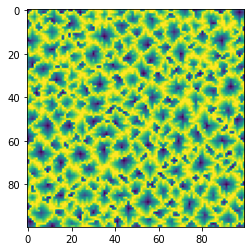

In [563]:
plt.imshow(day9arr)

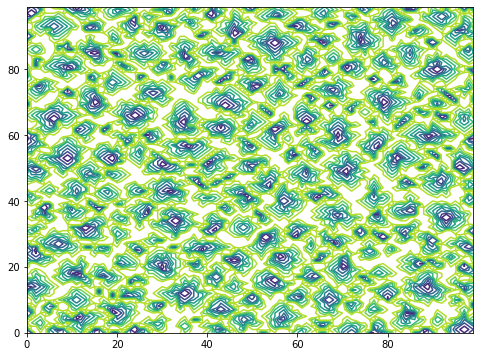

In [567]:
fig,ax=plt.subplots(figsize=(8,6))
ax.contour(day9arr,levels=9)

# Day 10

In [247]:
test_input=[
'[({(<(())[]>[[{[]{<()<>>',
'[(()[<>])]({[<{<<[]>>(',
'{([(<{}[<>[]}>{[]{[(<()>',
'(((({<>}<{<{<>}{[]{[]{}',
'[[<[([]))<([[{}[[()]]]',
'[{[{({}]{}}([{[{{{}}([]',
'{<[[]]>}<{[{[{[]{()[[[]',
'[<(<(<(<{}))><([]([]()',
'<{([([[(<>()){}]>(<<{{',
'<{([{{}}[<[[[<>{}]]]>[]]']

In [298]:
open_chars=['[','(','{','<']
close_chars=[']',')','}','>']
scores={')':3,'}':1197,']':57,'>':25137}

In [299]:
def illegal(line):
    is_open=[]
    for i,c in enumerate(line):
        if c in open_chars:
            is_open.append(c)
        elif c in close_chars and close_chars.index(c) == open_chars.index(is_open[-1]): #valid
            is_open.pop(-1) #it's closed so remove it
        else:
            #print(f"Expected {close_chars[open_chars.index(is_open[-1])]}, found {c} instead!")
            return scores[c]
    return 0

In [310]:
lscores=0
clean_test_input=[]
for line in test_input:
    score=illegal(line[:-1])
    lscores+=score
    if score ==0:
        clean_test_input.append(line)

In [295]:
lscores

26397

In [296]:
with open('input_day10.txt') as f:
    lines=f.readlines()

In [325]:
lscores=0
clean_input=[]
for line in lines:
    score=illegal(line[:-1])
    lscores+=score
    if score ==0:
        clean_input.append(line)

In [305]:
lscores

362271

## Part 2

Now, discard the corrupted lines. The remaining lines are incomplete.

Incomplete lines don't have any incorrect characters - instead, they're missing some closing characters at the end of the line. To repair the navigation subsystem, you just need to figure out the sequence of closing characters that complete all open chunks in the line.

Start with a total score of 0. Then, for each character, multiply the total score by 5 and then increase the total score by the point value given for the character in the following table:

    ): 1 point.
    ]: 2 points.
    }: 3 points.
    >: 4 points.


In [324]:
cscores={')':1,']':2,'}':3,'>':4}
def missing(line):
    is_open,complete=[],[]
    score=0
    for i,c in enumerate(line):
        if c in open_chars:
            is_open.append(c)
        elif c in close_chars and close_chars.index(c) == open_chars.index(is_open[-1]): #valid
            is_open.pop(-1) #it's closed so remove it
    if is_open !=[]: #still got characters left
        is_open.reverse()
        for c in is_open:
            cm=close_chars[open_chars.index(c)]
            complete.append(cm)
            score*=5
            score+=cscores[cm]
        #print(''.join(complete))
        return score

In [318]:
def repair(lines):
    scores=[]
    for line in lines:
        scores.append(missing(line))
    return scores

In [322]:
ss=repair(clean_test_input)

}}]])})]
)}>]})
}}>}>))))
]]}}]}]}>
])}>


In [323]:
np.median(ss)

288957.0

In [326]:
ss=repair(clean_input)

In [327]:
np.median(ss)

1698395182.0

# Day 11

There are 100 octopuses arranged neatly in a 10 by 10 grid. Each octopus slowly gains energy over time and flashes brightly for a moment when its energy is full. Although your lights are off, maybe you could navigate through the cave without disturbing the octopuses if you could predict when the flashes of light will happen.

The energy level of each octopus is a value between 0 and 9. Here, the top-left octopus has an energy level of 5, the bottom-right one has an energy level of 6, and so on.

You can model the energy levels and flashes of light in steps. During a single step, the following occurs:

    First, the energy level of each octopus increases by 1.
    Then, any octopus with an energy level greater than 9 flashes. This increases the energy level of all adjacent octopuses by 1, including octopuses that are diagonally adjacent. If this causes an octopus to have an energy level greater than 9, it also flashes. This process continues as long as new octopuses keep having their energy level increased beyond 9. (An octopus can only flash at most once per step.)
    Finally, any octopus that flashed during this step has its energy level set to 0, as it used all of its energy to flash.

Adjacent flashes can cause an octopus to flash on a step even if it begins that step with very little energy.

In [853]:
test_input=np.array([
[5,4,8,3,1,4,3,2,2,3],
[2,7,4,5,8,5,4,7,1,1],
[5,2,6,4,5,5,6,1,7,3],
[6,1,4,1,3,3,6,1,4,6],
[6,3,5,7,3,8,5,4,7,8],
[4,1,6,7,5,2,4,6,4,5],
[2,1,7,6,8,4,1,7,2,1],
[6,8,8,2,8,8,1,1,3,4],
[4,8,4,6,8,4,8,5,5,4],
[5,2,8,3,7,5,1,5,2,6]])

In [839]:
def day11_part1(test_input):
    s=0
    steps=100
    nflashes=0
    while s < steps:
        #if s >=50:
            #print(s,nflashes)
            #print(test_input)
        test_input+=1 #step 1
        nines=np.where(test_input >= 9)
        if nines[0].size > 0:
            #print(test_input)
            s+=1

            #test_input+=1 #start step 2 - there are now 9's and 10's
            #print(test_input)
            new_nines=np.where(test_input > 9)
            #print(new_nines)
            while new_nines[0].size >0:
                for x,y in zip(new_nines[0],new_nines[1]):
                    #print('x,y:',x,y)
                    test_input[x,y]*=-100 #so you know it flashed
                    for i in range(-1,2):
                        for j in range(-1,2):
                            if x+i >=0 and y+j >=0 and x+i <test_input.shape[0] and y+j <test_input.shape[1]:
                                test_input[x+i,y+j]+=1
                                #print(x+i,y+j)
                new_nines=np.where(test_input >= 10) #can also skip from say 9-11... doesn't necessarily pass through 10!
            test_input[test_input >9] = 0
            test_input[test_input <0] = 0
            nflashes +=(np.product(test_input.shape) - np.count_nonzero(test_input))
        else:
            #test_input+=1
            s+=1
    return nflashes

In [837]:
nflashes

1656

In [857]:
day11_input=np.array([
[6,1,1,1,8,2,1,7,6,7],
[1,7,6,3,6,1,1,6,1,5],
[3,5,1,2,6,8,3,1,3,1],
[8,5,8,2,7,7,1,4,7,3],
[8,2,1,4,8,1,3,8,7,4],
[2,3,2,5,8,2,3,2,1,7],
[2,2,2,2,4,8,2,8,2,3],
[5,4,7,1,3,5,6,7,8,2],
[3,7,3,8,6,7,1,2,8,7],
[8,6,7,5,2,2,6,5,7,4]
])

In [840]:
day11_part1(day11_input)

1793

In [851]:
def day11_part2(test_input,niter=1000):
    s=0
    nflashes=0
    while s < niter:
        if np.count_nonzero(test_input)!=0:
            test_input+=1 #step 1
            nines=np.where(test_input >= 9)
            if nines[0].size > 0:
                #print(test_input)
                s+=1

                #test_input+=1 #start step 2 - there are now 9's and 10's
                #print(test_input)
                new_nines=np.where(test_input > 9)
                #print(new_nines)
                while new_nines[0].size >0:
                    for x,y in zip(new_nines[0],new_nines[1]):
                        #print('x,y:',x,y)
                        test_input[x,y]*=-100 #so you know it flashed
                        for i in range(-1,2):
                            for j in range(-1,2):
                                if x+i >=0 and y+j >=0 and x+i <test_input.shape[0] and y+j <test_input.shape[1]:
                                    test_input[x+i,y+j]+=1
                                    #print(x+i,y+j)
                    new_nines=np.where(test_input >= 10) #can also skip from say 9-11... doesn't necessarily pass through 10!
                test_input[test_input >9] = 0
                test_input[test_input <0] = 0
                nflashes +=(np.product(test_input.shape) - np.count_nonzero(test_input))
            else:
                s+=1
        else:
            break
    return s,nflashes

In [858]:
day11_part2(day11_input,niter=2000)

(247, 4038)

# Day 12

Your goal is to find the number of distinct paths that start at start, end at end, and don't visit small caves more than once. There are two types of caves: big caves (written in uppercase, like A) and small caves (written in lowercase, like b). It would be a waste of time to visit any small cave more than once, but big caves are large enough that it might be worth visiting them multiple times. So, all paths you find should visit small caves at most once, and can visit big caves any number of times.

In [967]:
ex19=['dc-end',
'HN-start',
'start-kj',
'dc-start',
'dc-HN',
'LN-dc',
'HN-end',
'kj-sa',
'kj-HN',
'kj-dc']

         start
    |       |      |
    dc  -   HN -  kj -
    |    \   |      |
    LN     end     sa
    

In [969]:
def parse_day12input(lines):
    ltups=[]
    for line in lines:
        n1=line[:line.find('-')]
        n2=line[line.find('-')+1:]
        ltups.append((n1,n2))
        
    all_nodes=np.array(ltups).flatten()
    unique_nodes=np.unique(all_nodes)
    big_caves=[n for n in unique_nodes if n.isupper()]
    small_caves=[n for n in unique_nodes if n.islower()]
    small_caves.remove('start')
    small_caves.remove('end')
    big_caves,small_caves
    return ltups,big_caves,small_caves

In [970]:
ltups,big_caves,small_caves=parse_day12input(ex19)

In [965]:
import random

def walk(ltups,small_caves,small_caves_visited=[]):
    wpath=['start']
    next_step=''
    
    while next_step != 'end':
        next_step=step(ltups,wpath[-1],small_caves_visited)
        if next_step in small_caves:
            small_caves_visited.append(next_step)
        wpath.append(next_step)
    #print(wpath)
    return wpath
            
def step(ltups,last_step,small_caves_visited):
    for tup in ltups:
        if last_step in tup:
            next_step=tup[1-tup.index(last_step)] #the other one
            if next_step in small_caves_visited or next_step =='start':
                continue
            else:
                break
    return next_step
    
def find_unique_paths(ltups,small_caves):
    upaths=[walk(ltups,small_caves)]
    sc_visited=[c for c in upaths[0][1:-1] if c.islower()]
    print(sc_visited)
    next_walker=walk(ltups,small_caves,sc_visited)
    #print(upaths,next_walker)
    
    while next_walker not in upaths:
        upaths.append(next_walker)
        next_walker=walk(ltups,small_caves,sc_visited)
        print('next',next_walker)
        if np.sum([c.islower() for c in next_walker[1:-1]]) >=2:
            print('invalid path!')
            continue
        for c in next_walker[1:-1]:
            #print('here', small_caves_visited)
            if c.islower() and c not in sc_visited:
                sc_visited.append(c)
        print(sc_visited)
        random.shuffle(ltups)
    return upaths

In [988]:
def bfs(start, goal, twice):
    queue = [(start,set(),twice)]
    while queue:
        current,small,twice = queue.pop(0)
        if current == goal:
            yield 1
        elif current.islower():
            twice &= current not in small
            small.add(current)
        for node in maze.get(current,[]):
            if node not in small or twice:
                queue.append((node,small.copy(),twice))

In [991]:
maze = {}
for line in open('input_day12.txt').read().splitlines():
    s,e = line.split('-')
    #print(s,e)
    if s!='end' and e!='start': maze.setdefault(s,set()).add(e)
    if e!='end' and s!='start': maze.setdefault(e,set()).add(s)

In [992]:
sum(bfs('start','end',0))

4167

In [993]:
sum(bfs('start','end',1))

98441

In [924]:
upaths[1:-1]

NameError: name 'upaths' is not defined

In [971]:
find_unique_paths(ltups,small_caves)

['dc']
next ['start', 'HN', 'end']
['dc']


[['start', 'dc', 'end'], ['start', 'HN', 'end']]

In [980]:
walk(ltups,small_caves,['dc'])

['start', 'kj', 'sa', 'kj', 'HN', 'end']

In [978]:
random.shuffle(ltups)

In [979]:
ltups

[('kj', 'sa'),
 ('kj', 'dc'),
 ('start', 'kj'),
 ('LN', 'dc'),
 ('HN', 'end'),
 ('kj', 'HN'),
 ('dc', 'start'),
 ('dc', 'HN'),
 ('HN', 'start'),
 ('dc', 'end')]

# Day 13

The first section is a list of dots on the transparent paper. 0,0 represents the top-left coordinate. The first value, x, increases to the right. The second value, y, increases downward. So, the coordinate 3,0 is to the right of 0,0, and the coordinate 0,7 is below 0,0.

In [1196]:
def day13_part1(fname='test_input_day13.txt',first_fold_dir=np.flipud,first_fold_coord=7):
    coords=[]
    for line in open(fname).read().splitlines():
        try:
            x,y = line.split(',')
            coords.append([int(x),int(y)])
        except ValueError:
            break
    coords=np.array(coords)
    paper_size=[np.max(coords[:,1])+1,np.max(coords[:,0])+1]
    paper=np.zeros(paper_size)
    for x,y in coords:
        paper[y,x]=1
    if first_fold_dir==np.flipud:
        top_half=paper[:first_fold_coord]
        bottom_half=paper[first_fold_coord+1:]
    else: #other direction, fliplr
        top_half=paper[:,:first_fold_coord]
        bottom_half=paper[:,first_fold_coord+1:]
    folded=top_half+first_fold_dir(bottom_half)
    folded[folded >0]=1
    return folded,np.sum(folded)

In [1197]:
code,n=day13_part1()
print(n)

17.0


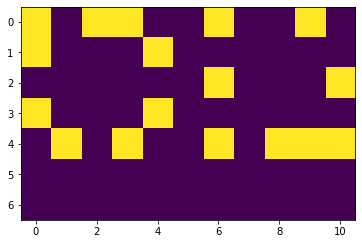

In [1198]:
plt.imshow(code)

In [1199]:
code,n=day13_part1('input_day13.txt',first_fold_dir=np.fliplr,first_fold_coord=655)
print(n)

759.0


In [1242]:
def day13_part2(fname='test_input_day13.txt'):
    coords,folds=[],[]
    for line in open(fname).read().splitlines():
        try:
            x,y = line.split(',')
            coords.append([int(x),int(y)])
        except ValueError:
            if line.startswith('fold'):
                folds.append([line[line.find("=")-1:line.find("=")],int(line[line.find("=")+1:])])
            else:
                continue
    coords=np.array(coords)
    paper_size=[np.max(coords[:,1])+2,np.max(coords[:,0])+1] #+2 in x because native size is even number which should not be allowed!
    print(paper_size)
    paper=np.zeros(paper_size)
    #paper = np.zeros((np.max(coords, axis = 0)[::-1]+1))
    for x,y in coords:
        paper[y,x]=1
    
    for f,n in folds:
        if f=='y':
            folded=paper[0:n,:]+np.flip(paper[n+1:,:],axis=0)
        else:
            folded=paper[:,0:n]+np.flip(paper[:,n+1:],axis=1)
    
        folded[folded >0]=1
        paper=folded
    return paper, coords,folds

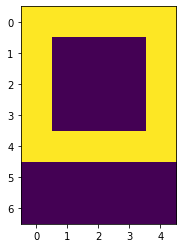

In [1230]:
code,_,_=day13_part2()
plt.imshow(code)

In [1243]:
code,coords,folds=day13_part2('input_day13.txt')

[895, 1311]


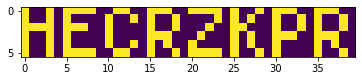

In [1244]:
plt.imshow(code)

# Day 14

In [22]:
pairs = {}
for line in open('input_day14.txt').read().splitlines():
    try:
        s,e = line.split(' -> ')
        pairs.setdefault(s,e)
    except ValueError:
        if line !='':
            poly_start=line

In [23]:
poly_start

'PHVCVBFHCVPFKBNHKNBO'

In [4]:
from collections import Counter

In [19]:
#don't construct the chain, that's a waste of time! just count pairs and elements
def day14(poly_start,pairs,nsteps=2):
    chain_start,chain_end=poly_start[0],poly_start[-1]
    #print(chain_start,chain_end)
    n_elems={p:0 for p in np.unique(list(pairs.values()))}
    n_pairs={p:0 for p in pairs.keys()}
    current_pairs=[poly_start[i:i+2] for i in range(len(poly_start)-1)]
    #don't do the insertion but count the number of pairs that end up in the next layer
    fp=[c[0]+pairs[c] for c in current_pairs]
    sp=[pairs[c]+c[1] for c in current_pairs]
    fp.extend(sp) #these are the pairs (order doesn't matter) that go into the next round
    n_next_steps=Counter(fp)
    for i in range(nsteps-1):
        for p in n_next_steps:
            n_pairs[p]+=n_next_steps[p] #add existing pairs to counter
        #perform 'insertion'
        #fp=[c[0]+pairs[c] for c in n_next_steps for j in range(n_next_steps[c])]
        #sp=[pairs[c]+c[1] for c in n_next_steps for j in range(n_next_steps[c])]
        # ^^ this is slow! just ad the numbers directly to the counter!
        #for each pair, get the 2 new keys
        n_new={p:0 for p in pairs.keys()}
        for c in n_next_steps:
            k1=c[0]+pairs[c]
            k2=pairs[c]+c[1]
            n_new[k1]+=n_next_steps[c]
            n_new[k2]+=n_next_steps[c]
        n_next_steps=Counter(n_new)
        #fp.extend(sp) #these are the pairs (order doesn't matter) that go into the next round
        #n_next_steps=Counter(fp)
    #now count the elements - all are being double counted except letters at beginning and end! 
    #which will always be the same
    for k in list(n_elems.keys()):
        n_elems[k]=np.sum([n_next_steps[p]*p.count(k) for p in n_next_steps.keys() if k in p])/2 #gets it wrong for doubles! eg. CC
        if k == chain_start or k == chain_end:
            n_elems[k]+=.5
    sorted_elems={k:v for v,k in sorted(zip(n_elems.values(),n_elems.keys()))}
    return sorted_elems[list(sorted_elems.keys())[-1]]-sorted_elems[list(sorted_elems.keys())[0]]

In [25]:
day14_part1(poly_start,pairs,nsteps=40)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


4439442043739.0

After step 10, B occurs 1749 times, C occurs 298 times, H occurs 161 times, and N occurs 865 times; taking the quantity of the most common element (B, 1749) and subtracting the quantity of the least common element (H, 161) produces 1749 - 161 = 1588.

In [1349]:
s1='NCNBCHB'
s2='NBCCNBBBCBHCB'
s3='NBBBCNCCNBBNBNBBCHBHHBCHB'
s4='NBBNBNBBCCNBCNCCNBBNBBNBBBNBBNBBCBHCBHHNHCBBCBHCB'
ss1=[s for s in s1]
ss2=[s for s in s2]
ss3=[s for s in s3]
ss4=[s for s in s4]

In [1357]:
Counter(ss3)

Counter({'N': 5, 'B': 11, 'C': 5, 'H': 4})

In [1291]:
fp=[c[0]+pairs[c] for c in current_pairs]
sp=[pairs[c]+c[1] for c in current_pairs]